In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
data=pd.read_csv('bank.csv.xls')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
#Dropping duration coloumn as it is very highly related with buying term ploicy(label) and is not useful when a client was never contacted before.
data.drop('duration',axis=1,inplace=True)

([<matplotlib.patches.Wedge at 0x1a18f20358>,
 [Text(-0.0903014,1.09629,'Did not Open Term Suscriptions'),
  Text(0.102615,-1.24578,'Opened Term Suscriptions')],
 [Text(-0.0492553,0.597975,'52.62%'), Text(0.0615691,-0.747469,'47.38%')])

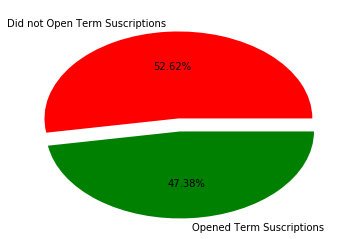

In [7]:
colors = ["Red", "Green"]

labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.pie(x=data.deposit.value_counts(),colors=colors,labels=labels,explode=[0,0.15],autopct='%1.2f%%')


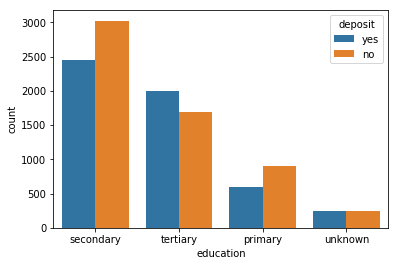

In [8]:
#the graph shows that how is the distribution of deposit among 
sb.countplot(data.education,hue=data.deposit)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18633da0>,
      dtype=object)

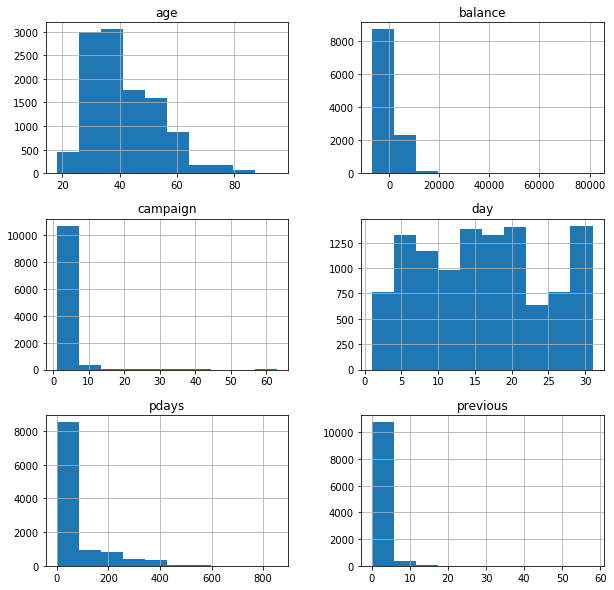

In [9]:
#Checking the distribution of numeric data
data.hist(figsize=(10,10))

/Users/rahulbhasker/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


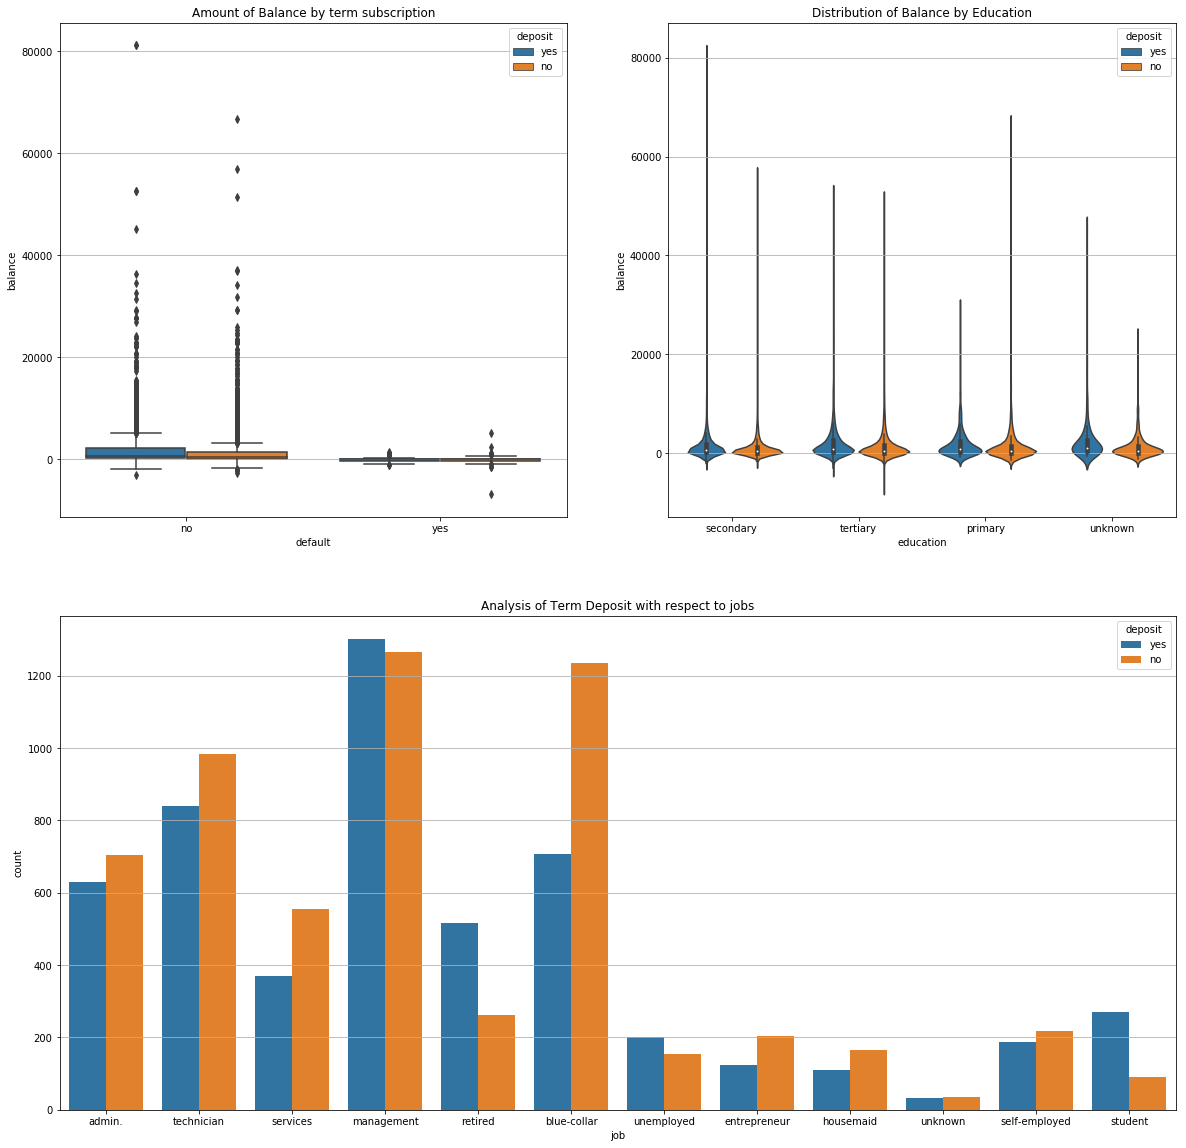

In [10]:
fig=plt.figure(figsize=(20,20))

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,1,2)

ax1.grid(True)
sb.boxplot(x=data.default,y=data.balance,hue=data.deposit,ax=ax1)
ax1.set_title("Amount of Balance by term subscription")

ax2.grid(True)
sb.violinplot(y=data.balance,x=data.education,hue=data.deposit,ax=ax2)
ax2.set_title("Distribution of Balance by Education")

ax3.grid(True)
ax3.set_xticklabels(np.arange(0,13000,500))
sb.countplot(x=data.job,hue=data.deposit,ax=ax3)
ax3.set_title("Analysis of Term Deposit with respect to jobs")
plt.show()

In [11]:
#Dropping the Coloumns having "Unknown" value as job types
data.drop(data.loc[data.job=="unknown"].index,inplace=True)

In [12]:
#As Admin and managment are same category thus, replacing admin as management
data.replace(to_replace="managment",value="management",inplace=True)

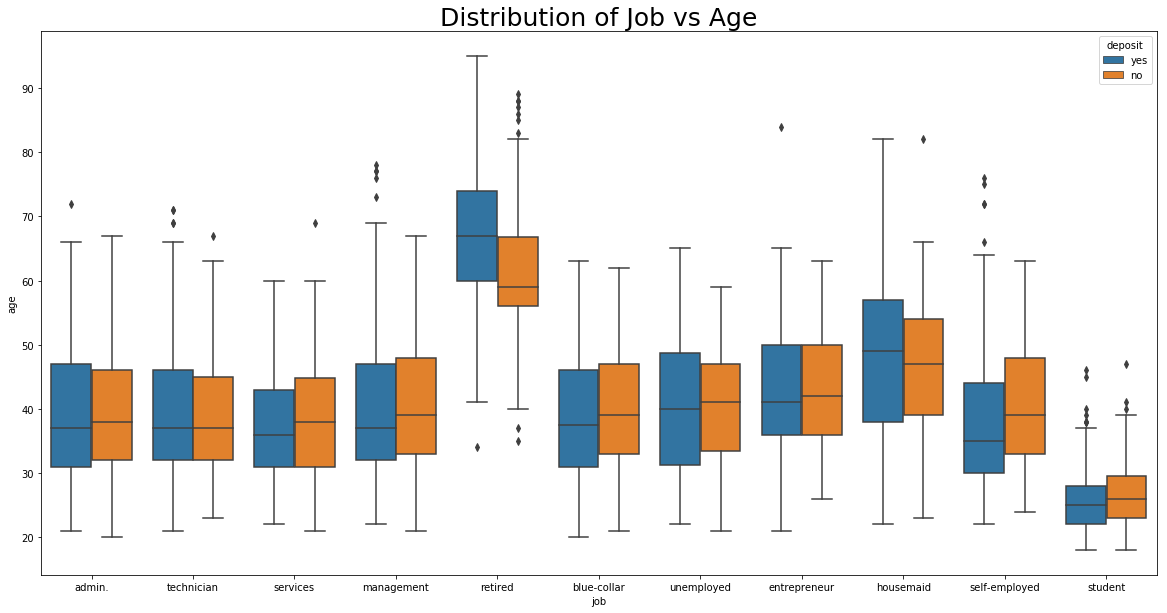

In [13]:
plt.figure(figsize=(20,10))
plt.title("Distribution of Job vs Age",fontsize=25)
sb.boxplot(x=data.job,y=data.age,hue=data.deposit)

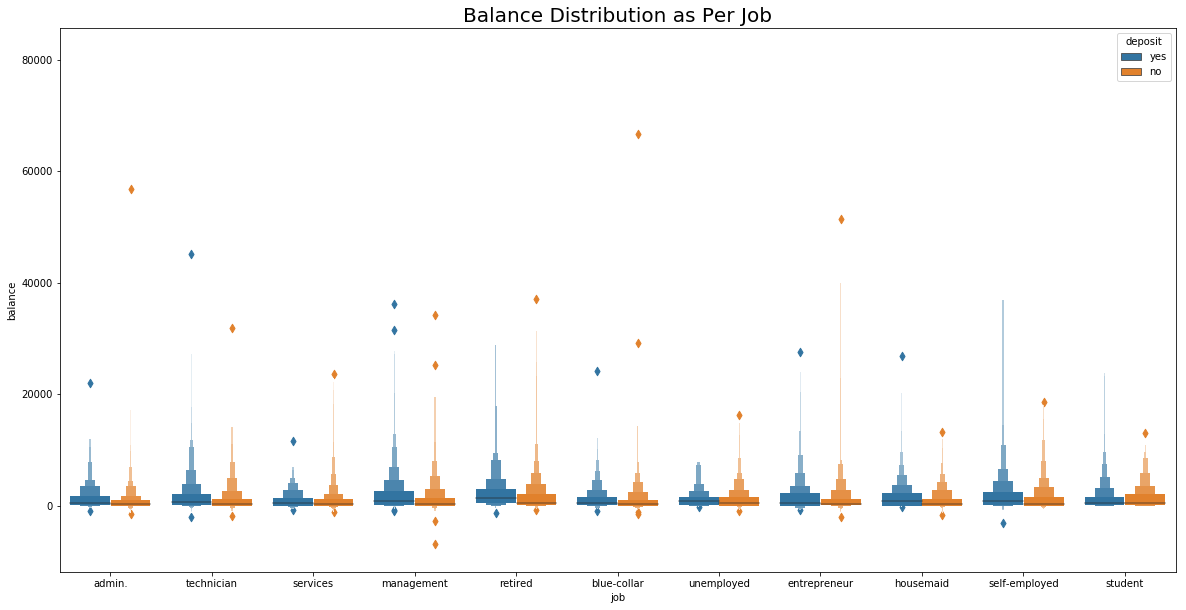

In [14]:
plt.figure(figsize=(20,10))
plt.title("Balance Distribution as Per Job", fontsize=20)
sb.boxenplot(x=data.job,y=data.balance,hue=data.deposit)

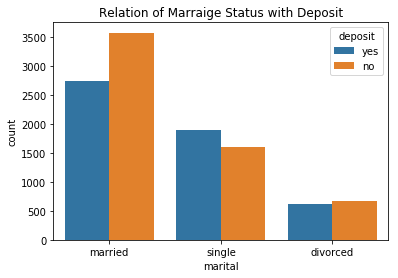

In [15]:
plt.title("Relation of Marraige Status with Deposit")
sb.countplot(data.marital,hue=data.deposit)

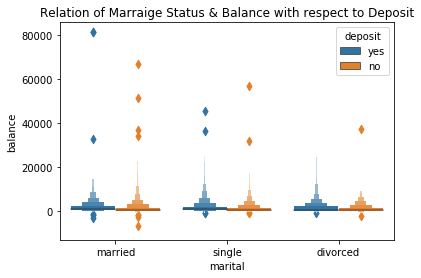

In [16]:
plt.title("Relation of Marraige Status & Balance with respect to Deposit")
sb.boxenplot(x=data.marital,y=data.balance,hue=data.deposit)

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


In [ ]:
#Label Encoding for Converting Categorical values to numeric type
data.job=data.job.astype('category')
data.job=data.job.cat.codes

In [36]:
data.marital=data.marital.astype('category')
data.marital=data.marital.cat.codes

In [42]:
data.education=data.education.astype('category')
data.education=data.education.cat.codes

data.default=data.default.astype('category')
data.default=data.default.cat.codes

data.housing=data.housing.astype('category')
data.housing=data.housing.cat.codes

data.loan=data.loan.astype('category')
data.loan=data.loan.cat.codes

data.contact=data.contact.astype('category')
data.contact=data.contact.cat.codes

data.month=data.month.astype('category')
data.month=data.month.cat.codes

data.poutcome=data.poutcome.astype('category')
data.poutcome=data.poutcome.cat.codes

data.deposit=data.deposit.astype('category')
data.deposit=data.deposit.cat.codes

In [125]:
X=data.iloc[:,:15]
Y=data.iloc[:,15:16]
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [317]:
gbc=GradientBoostingClassifier(criterion='mse',loss='deviance',n_estimators=100,subsample=1)
gbc.fit(x_train,y_train)

/Users/rahulbhasker/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.1,
              loss='deviance', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1, verbose=0, warm_start=False)

In [318]:
pred_values=gbc.predict(x_test)

In [319]:
from sklearn.metrics import accuracy_score

In [320]:
accuracy_score(y_test,pred_values)

0.7309772809231879

In [312]:
from sklearn.metrics import confusion_matrix

In [170]:
confusion_matrix(y_test,pred_values)

array([[1195,  265],
       [ 500,  813]])